In [1]:
import yaml
import random
import numpy as np
import time

from reader import Reader

from const import Const
from utils import get_F_example
from clustering import Clusters
from fastclustering import Fast_Clusters
from i_merge import IMerger
from Subclusterring import Subclusters

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# Если есть желание создать свои данные, то вызвать этот код

In [2]:
# X, y = make_blobs(n_samples=200, centers=7, cluster_std=0.6, random_state=0)

# ids = [i+1 for i in range(len(X))]
# df = pd.DataFrame()
# df['id'] = ids
# df['X1'] = X[:,0]
# df['X2'] = X[:,1]

In [3]:
# ids = []
# X1 = []
# X2 = []
# with open('Two.txt', 'r') as f:
#     for k, line in enumerate(f):
#         if k==0:
#             continue
#         ids.append(int(line.split()[0]))
#         X1.append(float(line.split()[1]))
#         X2.append(float(line.split()[2]))
#         if k>=205:
#             break
# df = pd.DataFrame()
# df['id'] = ids
# df['X1'] = X1
# df['X2'] = X2
    

In [4]:
reader = Reader()

In [5]:
df = reader.read('./Data/input.xlsx')

Stated size of data 206
Data contained  0 incorrect rows
Size of data 206
X1 contain 206 zero distances 0.00485
Interval: 0.5624383885659637
Interval: 2.202030150126224
Interval: 4.775592937282732
Interval: 7.876473867058306
Interval: 12.134224556930437
Interval: 20.210249664080493
Interval: 25.80276110611825
Interval: 29.759938477684845
Interval: 33.68334271839588
Interval: 39.8738639454961
histogram [11230  6494  3284  2498  3952  5868  4868  3238   754   250]
bins lenght [ 0.          5.15994626 10.31989251 15.47983877 20.63978502 25.79973128
 30.95967753 36.11962379 41.27957004 46.4395163  51.59946255]
X2 contain 206 zero distances 0.00485
Interval: 0.47196661695212405
Interval: 1.7052629870676346
Interval: 3.5935576634268958
Interval: 6.169573038092911
Interval: 8.723241261352642
Interval: 11.767436297909939
Interval: 15.17103685249453
Interval: 17.96197938368041
Interval: 21.40256909885971
Interval: 27.120400322022192
histogram [11184  6308  5734  4798  5822  3954  2908  1396   2

In [6]:
df, df_test = reader.split_data(df, train_size=99)

In [7]:
df.shape

(203, 3)

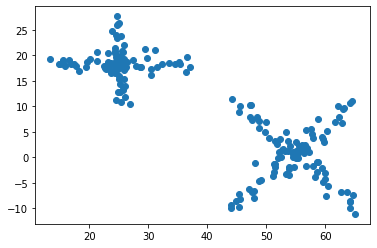

In [8]:
plt.scatter(df['X1'], df['X2'])
plt.show()

# Подбор констант

In [9]:
const = Const('./example1.yaml')

C:\Users\zheny\Documents\clusters\const.py:18: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  self.config = yaml.load(open(path, 'r'))


In [10]:
const.norm(df) # Нормировка

Persent of zeros start: 0.012315719225869078 for X 0
Persent of zeros finish: 0.004974822544439725 for X 0
Persent of zeros start: 0.012315719225869078 for X 1
Persent of zeros finish: 0.004974822544439725 for X 1


In [11]:
const.get_norms() # Получение норм

{'X1': 3.9029750249385122, 'X2': 3.0311249909367213}

In [12]:
a = time.time()
const.calculate_a(df, type_of_optimization=4) # Вычисление а и пересчет констант
b = time.time()
print(b-a)

You are calculate consts yet. Please, reload Const object from default settings
0.0


In [13]:
const.add_Fcolumn(df)

In [14]:
const.config # Вывод параметров

{'consts': {'Y_step': 2.5,
  'a': 2.01,
  'const': 0.25,
  'down_steps': 4,
  'max_depth': 10,
  'percent_X': 5,
  'percent_Y': 33,
  'percent_for_norms': 40,
  'percent_of_zeros': 0.005,
  'power_koef': 1.16,
  'round_const': 2,
  'threshold': 0.8,
  'up_steps': 6},
 'conturs': {'contour_points': 50,
  'min_diff': 0.0,
  'min_points': 30,
  'num_of_lenghts': 4},
 'isolated_cluster': {'constU1': 0.05,
  'divider': 2,
  'max_div_num': 8,
  'merge_threshold': 1.75,
  'min_dif': 0.0,
  'min_len': 1.01},
 'knots': {'min_fuses_num': 15, 'stop_const': 2.01},
 'subcluster': {'F_step': 0.001}}

In [15]:
const.config

{'consts': {'Y_step': 2.5,
  'a': 2.01,
  'const': 0.25,
  'down_steps': 4,
  'max_depth': 10,
  'percent_X': 5,
  'percent_Y': 33,
  'percent_for_norms': 40,
  'percent_of_zeros': 0.005,
  'power_koef': 1.16,
  'round_const': 2,
  'threshold': 0.8,
  'up_steps': 6},
 'conturs': {'contour_points': 50,
  'min_diff': 0.0,
  'min_points': 30,
  'num_of_lenghts': 4},
 'isolated_cluster': {'constU1': 0.05,
  'divider': 2,
  'max_div_num': 8,
  'merge_threshold': 1.75,
  'min_dif': 0.0,
  'min_len': 1.01},
 'knots': {'min_fuses_num': 15, 'stop_const': 2.01},
 'subcluster': {'F_step': 0.001}}

In [16]:
const.save_consts('example1') #Сохранение констант в файл

Writing settings in file example1 .yaml


Researching dataset

In [17]:
# fig = px.scatter_3d(df, x='X1', y='X2', z='F')
# fig.show()

# Fast Кластеризация

In [18]:
fastcluster = Fast_Clusters(const.config) 

In [19]:
df.shape

(203, 4)

In [20]:
df = fastcluster.multistep_clustering(df, 3)

100%|██████████████████████████████████████████████████████████████████████████████| 203/203 [00:00<00:00, 1552.40it/s]

0 None (203, 4)



C:\Users\zheny\Documents\clusters\fastclustering.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['F'] = F #add F to first df
100%|████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 3423.05it/s]

1 0 (99, 5)



c:\users\zheny\documents\pytorch\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\zheny\documents\pytorch\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\users\zheny\documents\pytorch\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

1 1 (104, 5)


100%|██████████████████████████████████████████████████████████████████████████████| 203/203 [00:00<00:00, 1423.48it/s]

2 0 (203, 6)


In [21]:
df = fastcluster.get_isolated_clusters(df) # Вычисление кластеров
df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 203/203 [00:00<00:00, 1356.96it/s]

None None (203, 6)


id        X1        X2         F  cluster_id_0  cluster_id_1  cluster_id_2  \
0   1  6.504796  3.579399  0.146368             0             0             0   
1   2  6.687886  3.924588  0.168533             0             0             0   
2   3  6.365158  4.238654  0.191224             0             0             0   
3   4  6.477681  4.252380  0.192869             0             0             0   
4   5  6.661658  4.581674  0.216840             0             0             0   

   cluster_id  
0           0  
1           0  
2           0  
3           0  
4           0

In [22]:
len(set(df['cluster_id_2']))

1

In [23]:
fastcluster.get_isolated_clusters(df[df['cluster_id']==44])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [24]:
len(set(df['cluster_id']))

2

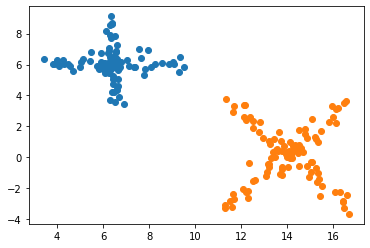

In [25]:
for cluster in set(df['cluster_id']):
    plt.scatter(df[df['cluster_id']==cluster]['X1'], df[df['cluster_id']==cluster]['X2'])

# Кластеризация

In [ ]:
cluster = Clusters(const.config) 

In [ ]:
df = cluster.get_isolated_clusters(df) # Вычисление кластеров
df.head()

In [ ]:
const.config

In [ ]:
len(set(df['cluster_id']))

In [ ]:
for cluster in set(df['cluster_id']):
    plt.scatter(df[df['cluster_id']==cluster]['X1'], df[df['cluster_id']==cluster]['X2'])


In [ ]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X3',
              color='cluster_id')
fig.show()

In [ ]:
df.head()

# Merge I

In [ ]:
df

In [ ]:
Merger = IMerger(const.config)
Merger.mergeClusters(df)

In [ ]:
set(df['cluster_id'])

In [ ]:
plt.scatter(df['X1'],df['X5'], c=df['cluster_id'])

In [ ]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X3',
              color='cluster_id')
fig.show()

# Subcluster

In [ ]:
const.config['subcluster']['F_step'] = 0.1

In [ ]:
sub = Subclusters(const.config)

In [ ]:
df = sub.subclustering(df, type_of_closed=2)

In [ ]:
fig = px.scatter(df, x="X1", y="X2", color="subcluster_id", hover_data=['id', 'F'], )
fig.show()

In [ ]:
fig = px.scatter_3d(df, x='X1', y='X2', z='X3',
              color='subcluster_id')
fig.show()

# Last Stage

In [ ]:
df[df['cluster_id']==7]

In [ ]:
df.head()

In [ ]:
class Classsifier():
    def __init__(self, mean, config):
        self.mean = mean
        self.config = config
        self.ignorename = ['cluster_id', 'subcluster_id']
        
    def __norm(self, df, mean):
        for name in self.mean:
            if name in df.columns:
                df[name] /= mean[name]
        return df
    
    def predict(self, df_train, df_predict, a=None):
        names_ouput = list(df_train)[1:]#Выделяем все имена из обучающих данных  
        names_input = list(df_predict)[1:]#Выделяем все имена из данных для предсказания
        needed_mean = {}
        needed_names = ['id']
        for name in names_input:
            if name in names_ouput:
                needed_names.append(name)
                needed_mean[name] = self.mean[name]
        if len(needed_names)==1:
            print('Нет общих координат') #Если нет общих координат, то прерываем программу
            return None
        
        df_train = df_train[needed_names+self.ignorename] # Выделяем необходимые имена
        df_predict = df_predict[needed_names] # Выделяем необходимые имена
        df_predict = self.__norm(df_predict, self.mean) #Нормируем данные
        
        inputs = df_predict.iloc[:].values
        #Работа с ребрами
        for cluster in sorted(df_train['cluster_id'].unique()): #проходим все кластеры
            time_df = df_train[lambda x: x['cluster_id']==cluster] #Выделяем все строки относящиеся к этому кластеру
            for subcluster in sorted(time_df['subcluster_id'].unique()): #проходим все подкластеры
                name = 'F_'+str(cluster) +'_' + str(subcluster) # Формируем имя столбца
                time_dfs = time_df[lambda x: x['subcluster_id']==subcluster] #Выделяем все строки относящиеся к этому подкластеру
                F = []
                for line in inputs:
                    F.append(get_F_example(time_dfs[needed_names].iloc[:].values, self.config['consts']['a'], line)) #Вычисляем F для каждой строки данных для предсказания
                df_predict[name] = F
        return df_predict

In [ ]:
clas = Classsifier(const.get_norms(), const.config)

In [ ]:
# del df_test['X5']
df_test['X6'] = 0

In [ ]:
df_test.head()

In [ ]:
df_predict = clas.predict(df, df_test)

In [ ]:
df.head()

In [ ]:
df_predict

In [ ]:
ignorename = ['F_0_0','F_0_1','F_0_2','F_0_3','F_0_4','F_0_5','F_0_6']
df_predict['cluster_id'] = df_predict[ignorename].idxmax(axis=1)
df_predict.head()

In [ ]:
const = Const()

In [ ]:
a = time.time()
const.calculate_a(df_test, type_of_optimization=4) # Вычисление а и пересчет констант
b = time.time()
print(b-a)

In [ ]:
fig = px.scatter_3d(df_predict, x='X1', y='X2', z='X3',
              color='cluster_id')
fig.show()